In [23]:
import pandas as pd
data=pd.read_csv('/content/matches.csv')
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [24]:
data = data.drop(columns=["id","date","match_type","team1","team2","result","result_margin","target_overs","target_runs","method","umpire1","umpire2"])


In [25]:
data

,season,city,player_of_match,venue,toss_winner,toss_decision,winner,super_over
0,2007/08,Bangalore,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,N
1,2007/08,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,N
2,2007/08,Delhi,MF Maharoof,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,N
3,2007/08,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,N
4,2007/08,Kolkata,DJ Hussey,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,N
...,...,...,...,...,...,...,...,...
1090,2024,Hyderabad,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,bat,Sunrisers Hyderabad,N
1091,2024,Ahmedabad,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,bat,Kolkata Knight Riders,N
1092,2024,Ahmedabad,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,N
1093,2024,Chennai,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Rajasthan Royals,field,Sunrisers Hyderabad,N


<Axes: title={'center': 'Win % by Team'}, ylabel='winner'>

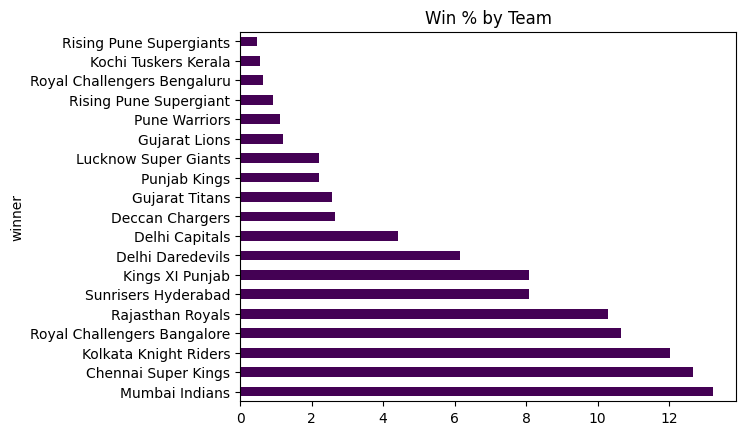

In [26]:
win_counts = data['winner'].value_counts()
win_percent = (win_counts / win_counts.sum()) * 100

win_percent.plot(kind='barh', title='Win % by Team', colormap='viridis')


toss_winner_won
True     50.593607
False    49.406393
Name: proportion, dtype: float64


<Axes: title={'center': 'Impact of Toss on Match Outcome'}, xlabel='toss_winner_won'>

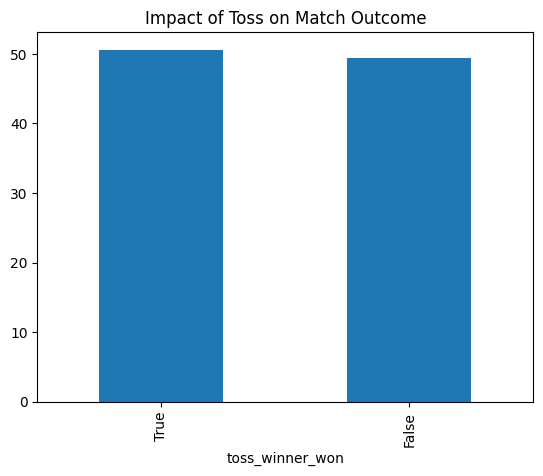

In [27]:
data['toss_winner_won'] = data['toss_winner'] == data['winner']
toss_effect = data['toss_winner_won'].value_counts(normalize=True) * 100

print(toss_effect)

toss_effect.plot(kind='bar', title='Impact of Toss on Match Outcome')


In [28]:
pom_counts = data['player_of_match'].value_counts().reset_index()
pom_counts

,player_of_match,count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,V Kohli,18
4,DA Warner,18
...,...,...
286,R Shepherd,1
287,Akash Madhwal,1
288,Shashank Singh,1
289,WD Parnell,1


In [29]:
import matplotlib.pyplot as plt

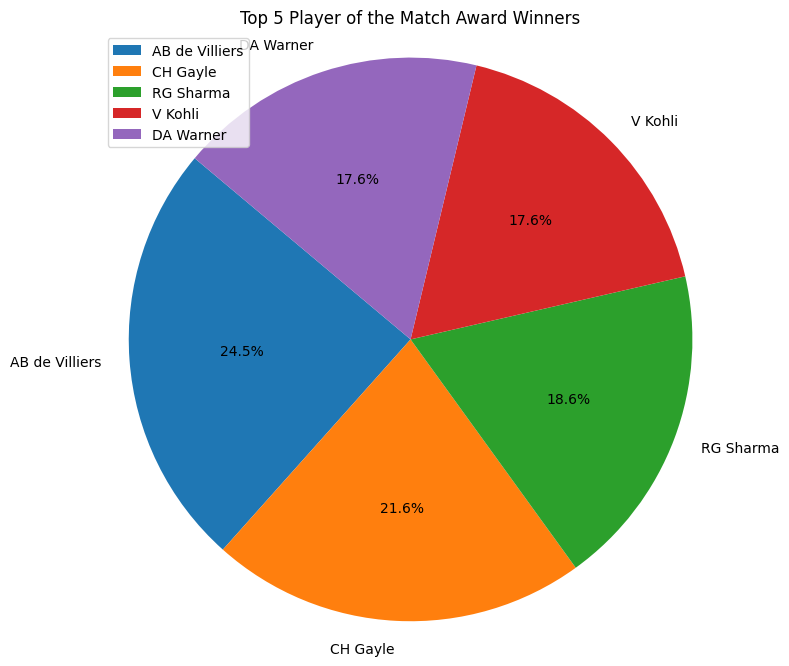

In [30]:
plt.figure(figsize=(8, 8))
# Select the top 5 players and their counts
top_5_pom = pom_counts.head(5)
plt.pie(top_5_pom['count'], labels=top_5_pom['player_of_match'] ,autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Player of the Match Award Winners")
plt.axis('equal')
plt.legend()
plt.show()